#  SENTIMENT ANALYSIS FOR KENYA AIRWAYS

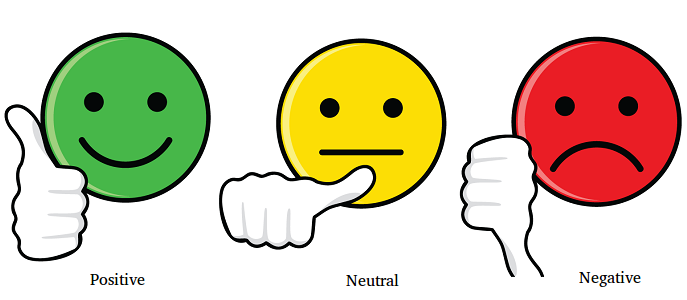

###  AUTHORS

* Winfred Kinya Bundi
* Jeremiah Waiguru
* Paul Ngatia
* Mercy Kiragu

##  1.0  PROJECT OVERVIEW

This project is focused on analyzing customer reviews of Kenya Airways to extract meaningful insights regarding customer satisfaction and service quality. By utilizing sentiment analysis techniques, the project will classify these reviews into positive, negative, or neutral sentiments. The goal is to help Kenya Airways identify areas of excellence as well as aspects of their service that may require improvement. This analysis will serve as a foundation for enhancing customer experience and driving operational improvements.

##  1.1  BUSINESS UNDERSTANDING

In the competitive aviation industry, customer satisfaction plays a vital role in shaping the reputation and success of an airline. Kenya Airways, like many airlines, receives numerous reviews from passengers, which contain valuable feedback about their experiences. Understanding the sentiments behind these reviews is essential for identifying strengths and weaknesses in service delivery. This project will leverage sentiment analysis to process and analyze customer feedback, enabling Kenya Airways to make informed decisions that enhance passenger satisfaction and loyalty.

##  1.2  PROBLEM STATEMENT

Kenya Airways is challenged by the vast amount of unstructured customer feedback available through online reviews. Without an efficient method to analyze this feedback, the airline may overlook critical insights that could lead to service improvements. This project aims to address this challenge by systematically analyzing the sentiment of customer reviews, providing Kenya Airways with a clear understanding of customer perceptions and identifying key areas that require attention.

##  1.3  OBJECTIVES

### Primary objective

To develop a robust sentiment analysis model that accurately classifies customer reviews of Kenya Airways into positive, negative, or neutral sentiments.

###  Specific objectives

1. To explore the sentiment distribution across different customer demographics, travel classes, and time periods.
2. To identify recurring themes and specific aspects of service (e.g., customer service, punctuality, in-flight experience) that are frequently mentioned in the reviews.
3. To assess the performance of various sentiment analysis models and determine the most effective model for this dataset.
4. To generate actionable insights from the sentiment analysis that can be used by Kenya Airways to improve customer service and address common issues

##  2.0  DATA UNDERSTANDING

We did Web Scraping from the 3 websites below and merged our datasets

1. https://uk.trustpilot.com/review/www.kenya-airways.com
2. https://www.airlinequality.com/airline-reviews/kenya-airways/
3. https://www.airlineratings.com/airlines/kenya-airways

The dataset has 3065 rows and 5 columns with the following description ;

* Departures: This column indicates the departure region or type of flight, such as "Africa" or "International."
* Class: This column specifies the class of travel, such as "Economy" or "Business Class."
* Review: This column contains customer reviews of their experiences with Kenya Airways. The text data may include opinions, complaints, and compliments about the airline.
* Rating: This column contains the numeric rating provided by the customer, typically ranging from 1.0 to 5.0, where 1.0 represents "Poor" and 5.0 represents "Excellent."
* Rating_description: This column provides a textual description corresponding to the numeric rating, such as "Poor," "Good," or "Excellent."

## Importing Necessary Libraries

In [1]:
# importing libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px 

import string
import joblib
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud 
from sklearn.metrics import roc_curve, auc

#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. 1 Loading Datasets

### 1.Dataset one

In [2]:
#Kenya_airways_flights
df1= pd.read_csv('Refined data/Dataset_one.csv')
df1.sample(1000)

,Date3,Departures,Class,Review,Rating_Value,Rating_Description
973,2018-12-01,Africa,Business Class,I arrived NBO on KQ 480 FROM Dar @ 5.45am. I a...,3.0,Average
2019,2016-12-01,Africa,Economy,Flight delayed in joburg for 2 hours. Which me...,1.0,Poor
304,2019-11-01,Africa,Economy,"terrible service, always late. Generally a hor...",1.0,Poor
97,2022-02-01,Domestic,Economy,The KQ flight officer at Gate 1 checking my bo...,1.0,Poor
1497,2020-01-01,0,Unknown,No Review,NaN,Unknown
...,...,...,...,...,...,...
251,2019-12-01,International,Business Class,"Delays in all flights , baggage missing , terr...",1.0,Poor
820,2019-03-01,International,Economy,Whilst flying with Kenya Airways doesn’t diffe...,1.0,Poor
1362,2018-05-01,Africa,Economy,The Dreamliner is very nice but the seat confi...,4.0,Good
681,2019-06-01,Africa,Economy,Kenyan Air must be the worst airline I’ve ever...,1.0,Poor


In [3]:
def describe_columns(df1):
    # Print column names
    print("Column Names:")
    print(df1.columns)

    # Print number of rows and columns
    print("\nShape:")
    print(df1.shape)

describe_columns(df1)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating_Value',
       'Rating_Description'],
      dtype='object')

Shape:
(2345, 6)


The Dataset has 2345 rows and 6 columns.
The other columns are categorical or text-based.

### 2.Dataset two

In [4]:
#Kenya_airways_reviews
df2= pd.read_csv('Refined data/Dataset_two.csv')
df2.head()

,Date3,Review
0,2024-02-24,✅ Trip Verified | I have never seen such a dis...
1,2024-02-24,Not Verified | Bumped off flight at boarding...
2,2024-07-30,✅ Trip Verified | I am disappointment with t...
3,2024-07-25,✅ Trip Verified | This airline is becoming mo...
4,2024-07-24,✅ Trip Verified | 3 out of 4 flights delayed ...


In [5]:
def describe_columns(df2):
    # Print column names
    print("Column Names:")
    print(df2.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df2.shape)

describe_columns(df2)

Column Names:
Index(['Date3', 'Review'], dtype='object')

Shape:
(477, 2)


The Dataset has 477 rows and 2 columns.

### 3.Dataset three

In [6]:
# KQ_reviews
df3= pd.read_csv('Refined data/Dataset_three.csv')
df3.head()

,Date3,Rating,Review
0,02-08-2024,0.0,Constantly canceling flights Kenya airlines ca...
1,04-08-2024,0.0,Kenya Airways canceled the flight and… Kenya A...
2,30-07-2024,0.0,If your thinking of Kenya Airlines...think aga...
3,29-07-2024,0.0,"Worst airlines ever Worst airlines ever, not f..."
4,25-07-2024,0.0,We were trying to go to Nampula from Nairobi a...


In [7]:
def describe_columns(df3):
    # Print column names
    print("Column Names:")
    print(df3.columns)

    # Print number of rows and columns 
    print("\nShape:")
    print(df3.shape)

describe_columns(df3)

Column Names:
Index(['Date3', 'Rating', 'Review'], dtype='object')

Shape:
(243, 3)


The Dataset has 243 rows and 3 columns.Mainly, 'Date', 'Rating and 'Review'

## Loading the Merged Dataset

In [8]:
# KQ_Data
df = pd.read_csv('Refined data/KQ_Data.csv')
df

,Date3,Departures,Class,Review,Rating,Rating_Description
0,2022-09-01 00:00:00,Africa,Economy,Recently I travelled for business from Cape To...,4.0,Good
1,2022-11-01 00:00:00,International,Economy,I want to thanks to Jane for her excellent ser...,5.0,Excellent
2,2022-05-01 00:00:00,International,Economy,not a bad airline to fly with could do with a ...,4.0,Good
3,2022-11-01 00:00:00,Africa,Business Class,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0,Poor
4,2022-11-01 00:00:00,Africa,Economy,"Absolutely appalling airline, never ever use i...",1.0,Poor
...,...,...,...,...,...,...
3060,26-01-2017,NaN,NaN,Better than I expected Much better service tha...,0.0,NaN
3061,30-08-2016,NaN,NaN,Request for immediate action. I have never had...,0.0,NaN
3062,02-07-2016,NaN,NaN,Never again Flew with Kenya airways last year ...,0.0,NaN
3063,21-11-2015,NaN,NaN,NEVER AGAIN - RUBISH COMPANY !!! We travelled ...,1.0,NaN


In [9]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

Data Types:
Date3                  object
Departures             object
Class                  object
Review                 object
Rating                float64
Rating_Description     object
dtype: object

Shape:
(3065, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date3               3063 non-null   object 
 1   Departures          2345 non-null   object 
 2   Class               2345 non-null   object 
 3   Review              3065 non-null   object 
 4   Rating              2578 non-null   float64
 5   Rating_Description  2345 non-null   object 
dtypes: float64(1), object(5)
memory usage: 143.8+ KB
None

Descriptive Statistics:
            Rating
count  2578.000000
mean      2.865012
std 

The dataset has 3065 rows and 6 columns. It also has missing values, with some columns registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the Review column needs preprocessing since it contains raw text with numbers, nametags,emojis and punctuations.

## 3.0 DATA PREPARATION

### 3.1  Data Cleaning

Steps to start cleaning the data:

*  Focus on the columns or attributes that are relevant for your analysis or purposes.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

In [10]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print("Missing values in each column:")
print(missing_values)

# Check the percentage of missing values in each column (optional)
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Missing values in each column:
Date3                   2
Departures            720
Class                 720
Review                  0
Rating                487
Rating_Description    720
dtype: int64

Percentage of missing values in each column:
Date3                  0.065253
Departures            23.491028
Class                 23.491028
Review                 0.000000
Rating                15.889070
Rating_Description    23.491028
dtype: float64


Overall Insights:
* High Missing Data: Columns Departures, Class, and Rating_Description have a significant amount of missing data (23.49%). 
* Depending on the analysis, we have the option to either impute these values, drop the rows/columns, or find another way to handle them.(Use placeholders)
* Moderate Missing Data: The Rating column has a moderate level of missing values (15.89%), which could influence the analysis if not addressed.
* Low Missing Data: The Date3 column has very few missing values (0.07%), making it easier to handle.

###  dealing with missing values
For the columns: (Departures, Class, Date3, and Rating_Description) we will replace them with placeholders so as to retain them since they can be helpful in analysis. For the Rating column however, we will fill missing values with the median of that column.

In [11]:
df = pd.read_csv('Refined data/KQ_Data.csv')

# Replace missing values with placeholders
# Specify the placeholder for each column or use a general placeholder for all missing values

df['Date3'].fillna('Missing Date', inplace=True)
df['Departures'].fillna('Unknown', inplace=True)
df['Class'].fillna('Unknown', inplace=True)
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Rating_Description'].fillna('Poor', inplace=True)

# Check the result
df.sample(200)


,Date3,Departures,Class,Review,Rating,Rating_Description
2387,2024-02-24 00:00:00,Unknown,Unknown,✅ Trip Verified | It is truly distressing for...,3.0,Poor
1474,2018-03-01 00:00:00,Africa,Economy,The flight was on time. The cabin crew was cou...,4.0,Good
2493,2020-01-06 00:00:00,Unknown,Unknown,Not Verified | Cape Town to Mumbai via Nairob...,3.0,Poor
1407,2020-01-01 00:00:00,0,Unknown,Our flight from Bangkok to Nairobi on Kenya Ai...,1.0,Poor
2234,2016-05-01 00:00:00,International,Economy,Flew Kenyan Airways in the month of May .Not o...,2.0,Poor
...,...,...,...,...,...,...
1237,2018-08-01 00:00:00,Africa,Economy,Flight took off without a hitch and on time......,2.0,Poor
648,2019-06-01 00:00:00,International,Economy,A good enough airline. Although as with most a...,4.0,Good
1907,2017-05-01 00:00:00,International,Economy,My son has left for 6 weeks studying lemurs in...,5.0,Excellent
1448,2018-02-01 00:00:00,International,Business Class,On my flight from Amsterdam to Lusaka via Nair...,5.0,Excellent


In [12]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values

Date3                 0
Departures            0
Class                 0
Review                0
Rating                0
Rating_Description    0
dtype: int64

Our Dataset is now okay and does not contain any Missing data

## Data Preprocessing

#### Feature selection

In [13]:
df.columns

Index(['Date3', 'Departures', 'Class', 'Review', 'Rating',
       'Rating_Description'],
      dtype='object')

In [15]:
KQ_df = df[['Rating_Description', 'Review','Rating']]
KQ_df.head(10)

,Rating_Description,Review,Rating
0,Good,Recently I travelled for business from Cape To...,4.0
1,Excellent,I want to thanks to Jane for her excellent ser...,5.0
2,Good,not a bad airline to fly with could do with a ...,4.0
3,Poor,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0
4,Poor,"Absolutely appalling airline, never ever use i...",1.0
5,Excellent,We flew from Heathrow to Nairobi on our way to...,5.0
6,Poor,Was travling from Kenya to South Africa last w...,1.0
7,Good,"After reading the reviews on here, I was prepa...",4.0
8,Poor,"Kenya Airways is very disorganzied, first of a...",1.0
9,Poor,I travelled to London on July 10th ON KQ100 wi...,1.0


From our data overview, the Review column contains raw text with unwanted characters, numbers,whitespaces, punctuations and also nametags which will need to be parsed.

In [16]:
# Remove special characters, unwanted characters, unnecessary phrases
def remove_special_characters(text):
    text = re.sub(r'\r\n|\n', ' ', text)
    return text

def remove_extra_whitespace(text):
    text = ' '.join(text.split())
    return text

def convert_to_lowercase(text):
    text = text.lower()
    return text

def remove_unnecessary_phrases(text):
    text = re.sub(r'dear\s+[\w\s]+,', '', text)
    return text

def standardize_rating_descriptions(rating):
    rating_mapping = {
        'Excellent': 'excellent',
        'Good': 'good',
        'Poor': 'poor'
    }
    return rating_mapping.get(rating, rating)


In [17]:
def clean_text(text):
    text = remove_special_characters(text)
    text = remove_extra_whitespace(text)
    text = convert_to_lowercase(text)
    text = remove_unnecessary_phrases(text)
    return text

# Apply the cleaning function to the 'Review' column
KQ_df['Review'] = KQ_df['Review'].apply(clean_text)

# Apply the standardization function to the 'Rating_Description' column
KQ_df['Rating_Description'] = KQ_df['Rating_Description'].apply(standardize_rating_descriptions)

# Display the cleaned DataFrame
KQ_df.head(10)


,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,"i am on my way to zanzibar from bangui, with ...",1.0
4,poor,"absolutely appalling airline, never ever use i...",1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,"after reading the reviews on here, i was prepa...",4.0
8,poor,"kenya airways is very disorganzied, first of a...",1.0
9,poor,i travelled to london on july 10th on kq100 wi...,1.0


In [18]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df["Review"] = KQ_df["Review"].apply(remove_nametags)
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,"i am on my way to zanzibar from bangui, with a...",1.0
4,poor,"absolutely appalling airline, never ever use i...",1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,"after reading the reviews on here, i was prepa...",4.0
8,poor,"kenya airways is very disorganzied, first of a...",1.0
9,poor,i travelled to london on july 10th on kq100 wi...,1.0


In [19]:
# Remove numbers and punctuations
# numbers
num_pattern = r'[0-9]'
KQ_df['Review'] = KQ_df['Review'].replace(to_replace=num_pattern, value='', regex=True)

# punctuations
KQ_df['Review'] = KQ_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,i am on my way to zanzibar from bangui with an...,1.0
4,poor,absolutely appalling airline never ever use it...,1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,after reading the reviews on here i was prepar...,4.0
8,poor,kenya airways is very disorganzied first of al...,1.0
9,poor,i travelled to london on july th on kq with c...,1.0


In [20]:
#remove emojis
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

KQ_df["Review"] = KQ_df["Review"].apply(remove_emojis)


In [21]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string 

KQ_df["Review"] = KQ_df["Review"].apply(remove_non_standard_char)

KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently i travelled for business from cape to...,4.0
1,excellent,i want to thanks to jane for her excellent ser...,5.0
2,good,not a bad airline to fly with could do with a ...,4.0
3,poor,i am on my way to zanzibar from bangui with an...,1.0
4,poor,absolutely appalling airline never ever use it...,1.0
5,excellent,we flew from heathrow to nairobi on our way to...,5.0
6,poor,was travling from kenya to south africa last w...,1.0
7,good,after reading the reviews on here i was prepar...,4.0
8,poor,kenya airways is very disorganzied first of al...,1.0
9,poor,i travelled to london on july th on kq with c...,1.0


In [22]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
KQ_df['Review'] = KQ_df['Review'].str.replace(urlpattern, '')

In [23]:
# list stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would','youve']

In [24]:
def remove_stopwords(words):
    """A simple function to remove stopwords from a string"""
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

KQ_df['Review'] = KQ_df['Review'].apply(remove_stopwords)
# Print the first 5 rows of the new column
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recently travelled business cape town entebbe ...,4.0
1,excellent,want thanks jane excellent service flight conn...,5.0
2,good,not bad airline fly could better selection mov...,4.0
3,poor,way zanzibar bangui upgraded flight sky priori...,1.0
4,poor,absolutely appalling airline never ever use in...,1.0
5,excellent,flew heathrow nairobi way zanzibar plane boein...,5.0
6,poor,travling kenya south africa last week heading ...,1.0
7,good,reading reviews prepared worst say website dif...,4.0
8,poor,kenya airways disorganzied first never answer ...,1.0
9,poor,travelled london july th kq children paid upgr...,1.0


Stopwords are common in texts but offer minimal semantic value. Removing them helps reduce noise and highlights more significant words, enhancing the efficiency and effectiveness of our models. We tailored our stopword list to include terms that we believe diminish the overall sentiment.

#### Stemming

In [25]:
stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()
def stem_words(review):
    """A function to stem words in a review text"""
    stem_words = []
    for word in review.split():
        stem_word = stemmer.stem(word)
        stem_words.append(stem_word)
    return " ".join(stem_words)

KQ_df["Review"] = KQ_df["Review"].apply(stem_words)
KQ_df.head(10)

,Rating_Description,Review,Rating
0,good,recent travel busi cape town entebb uganda lay...,4.0
1,excellent,want thank jane excel servic flight connect ke...,5.0
2,good,not bad airlin fli could better select movi mu...,4.0
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0
4,poor,absolut appal airlin never ever use incred unr...,1.0
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0
6,poor,travl kenya south africa last week head board ...,1.0
7,good,read review prepar worst say websit difficult ...,4.0
8,poor,kenya airway disorganzi first never answer pho...,1.0
9,poor,travel london juli th kq children paid upgrad ...,1.0


In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def tokenize_reviews(df):
    """Function to tokenize each review in the 'Review' column."""
    df['Tokenized_Review'] = df['Review'].apply(nltk.word_tokenize)
    return df

# Apply the function to your DataFrame
KQ_df = tokenize_reviews(KQ_df)

# Display the DataFrame to see the tokenized reviews
(KQ_df[['Rating_Description','Review','Rating' ,'Tokenized_Review']].head())


,Rating_Description,Review,Rating,Tokenized_Review
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga..."
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con..."
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,..."
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p..."
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc..."


In [28]:

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tokenize each review in the 'Review' column and get the impactful words
num_words = 5  # Number of impactful words to extract
KQ_df['Tokenized_Review'] = KQ_df['Review'].apply(nltk.word_tokenize)

# Calculate sentiment scores and extract impactful words
KQ_df['Impactful_Words'] = KQ_df['Tokenized_Review'].apply(
    lambda tokens: [word for word, score in sorted(
        {token: sia.polarity_scores(token)["compound"] for token in tokens}.items(),
        key=lambda x: x[1], reverse=True
    )][:num_words]
)

# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review', 'Rating','Tokenized_Review', 'Impactful_Words']].head())


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"


In [29]:
# Initialize empty lists to store positive and negative impactful words
positive_impactful_words = []
negative_impactful_words = []

# Loop through each tokenized review
for tokens in KQ_df['Tokenized_Review']:
    # Calculate sentiment scores for each token
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    
    # Sort tokens by their sentiment scores
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
    # Categorize words as positive or negative based on their sentiment score
    for word, score in sorted_words:
        if score > 0:  # Positive score
            positive_impactful_words.append(word)
        elif score < 0:  # Negative score
            negative_impactful_words.append(word)

# Output the lists of positive and negative impactful words
("Positive Impactful Words:", positive_impactful_words)
("Negative Impactful Words:", negative_impactful_words)


('Negative Impactful Words:',
 ['pay',
  'stop',
  'bad',
  'bad',
  'pay',
  'miss',
  'stop',
  'lost',
  'bad',
  'strike',
  'miss',
  'cancel',
  'avoid',
  'bother',
  'pretend',
  'strike',
  'miss',
  'complain',
  'hard',
  'pay',
  'delay',
  'difficult',
  'problem',
  'worst',
  'rude',
  'bad',
  'complaint',
  'cancel',
  'embarrass',
  'sad',
  'pay',
  'cancel',
  'fault',
  'lose',
  'poor',
  'bad',
  'hard',
  'pay',
  'cancel',
  'lost',
  'interrupt',
  'spam',
  'problem',
  'fault',
  'wrong',
  'bad',
  'cancel',
  'disgust',
  'hard',
  'avoid',
  'delay',
  'cramp',
  'pay',
  'miss',
  'delay',
  'lack',
  'disappoint',
  'poor',
  'stolen',
  'fail',
  'worst',
  'pay',
  'low',
  'stop',
  'worn',
  'shock',
  'problem',
  'poor',
  'bad',
  'worst',
  'complain',
  'bad',
  'scam',
  'miss',
  'delay',
  'rude',
  'delay',
  'disappoint',
  'pay',
  'drop',
  'delay',
  'destroy',
  'worst',
  'mistaken',
  'sad',
  'worst',
  'rude',
  'disappoint',
  'mi

In [30]:
# Dividing the KQ_df DataFrame based on the 'Rating_Description' column

# DataFrame for "Poor" ratings
neg_df = KQ_df[KQ_df['Rating_Description'] == 'poor']

# DataFrame for "Excellent" ratings
pos_df = KQ_df[KQ_df['Rating_Description'] == 'excellent']

# DataFrame for "Good" ratings
neu_df = KQ_df[KQ_df['Rating_Description'] == 'good']

# Display the first few rows of each DataFrame to verify the split
print("Negative Reviews (poor):")
(neg_df.head())



Negative Reviews (poor):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]"
6,poor,travl kenya south africa last week head board ...,1.0,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]"
8,poor,kenya airway disorganzi first never answer pho...,1.0,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]"
9,poor,travel london juli th kq children paid upgrad ...,1.0,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]"


In [31]:
print("Neutral Reviews (good):")
(neu_df.head())

Neutral Reviews (good):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
0,good,recent travel busi cape town entebb uganda lay...,4.0,"[recent, travel, busi, cape, town, entebb, uga...","[free, friend, enjoy, good, better]"
2,good,not bad airlin fli could better select movi mu...,4.0,"[not, bad, airlin, fli, could, better, select,...","[better, good, not, airlin, fli]"
7,good,read review prepar worst say websit difficult ...,4.0,"[read, review, prepar, worst, say, websit, dif...","[good, fine, read, review, prepar]"
38,good,checkin klm sky prioriti check counter subsequ...,4.0,"[checkin, klm, sky, prioriti, check, counter, ...","[love, greatest, great, super, superior]"
43,good,st famili holiday holiday us last year due cov...,4.0,"[st, famili, holiday, holiday, us, last, year,...","[love, great, wow, kind, cheer]"


In [32]:
print("Positive Reviews (excellent):")
(pos_df.head())


Positive Reviews (excellent):


,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]"
11,excellent,great servic friend staff belinda calvin frien...,5.0,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]"
15,excellent,pleasant surpris airlin servic good smooth lan...,5.0,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]"
39,excellent,amaz servic st leg room suffici that realli co...,5.0,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]"


In [33]:

def positive_impactful_words(review, num_words=2):
    """Gets the most impactful positive words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words if score > 0][:num_words]
    return impactful_words

def negative_impactful_words(review, num_words=2):
    """Gets the most impactful negative words in a review."""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words = sorted(scores.items(), key=lambda x: x[1])
    impactful_words = [word for word, score in sorted_words if score < 0][:num_words]
    return impactful_words

# Apply these functions to your DataFrame
pos_df['impactful_words'] = pos_df['Review'].apply(positive_impactful_words)
neg_df['impactful_words'] = neg_df['Review'].apply(negative_impactful_words)


In [34]:
pos_df.head()

,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words,impactful_words
1,excellent,want thank jane excel servic flight connect ke...,5.0,"[want, thank, jane, excel, servic, flight, con...","[excel, nice, thank, want, jane]","[excel, nice]"
5,excellent,flew heathrow nairobi way zanzibar plane boe d...,5.0,"[flew, heathrow, nairobi, way, zanzibar, plane...","[friend, good, better, recommend, entertain]","[friend, good]"
11,excellent,great servic friend staff belinda calvin frien...,5.0,"[great, servic, friend, staff, belinda, calvin...","[great, friend, fit, recommend, servic]","[great, friend]"
15,excellent,pleasant surpris airlin servic good smooth lan...,5.0,"[pleasant, surpris, airlin, servic, good, smoo...","[pleasant, good, surpris, airlin, servic]","[pleasant, good]"
39,excellent,amaz servic st leg room suffici that realli co...,5.0,"[amaz, servic, st, leg, room, suffici, that, r...","[great, friend, amaz, servic, st]","[great, friend]"


In [35]:
neg_df.head()

,Rating_Description,Review,Rating,Tokenized_Review,Impactful_Words,impactful_words
3,poor,way zanzibar bangui upgrad flight sky prioriti...,1.0,"[way, zanzibar, bangui, upgrad, flight, sky, p...","[nice, support, holiday, like, yep]","[bad, lost]"
4,poor,absolut appal airlin never ever use incred unr...,1.0,"[absolut, appal, airlin, never, ever, use, inc...","[like, absolut, appal, airlin, never]","[bother, avoid]"
6,poor,travl kenya south africa last week head board ...,1.0,"[travl, kenya, south, africa, last, week, head...","[clear, well, travl, kenya, south]","[complain, miss]"
8,poor,kenya airway disorganzi first never answer pho...,1.0,"[kenya, airway, disorganzi, first, never, answ...","[recommend, well, number, kenya, airway]","[bad, rude]"
9,poor,travel london juli th kq children paid upgrad ...,1.0,"[travel, london, juli, th, kq, children, paid,...","[support, comfort, travel, london, juli]",[complaint]


#### EXPLORATORY DATA ANALYSIS(EDA)

#### DISTRIBUTION OF RATINGS

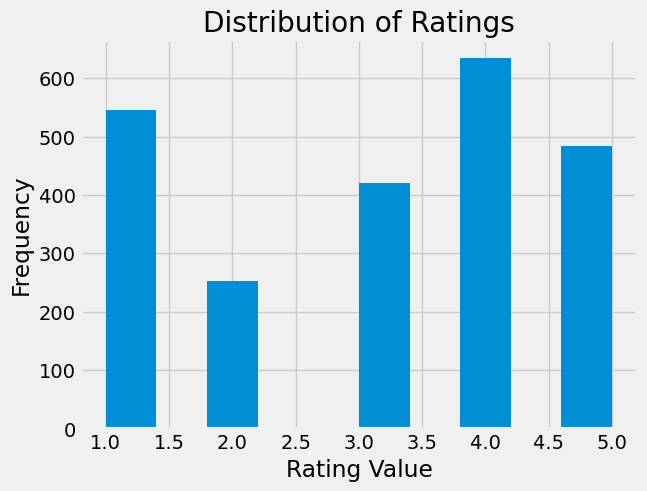

In [36]:
df1['Rating_Value'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()


 A majority of ratings cluster around the higher end of the scale, with 4.0 and 5.0 being the most frequent. This indicates a positive bias in the dataset, as lower ratings are significantly less common. Such a distribution might suggest high overall customer satisfaction or potential rating inflation. 


#### CHECKING THE SPREAD OF RATINGS

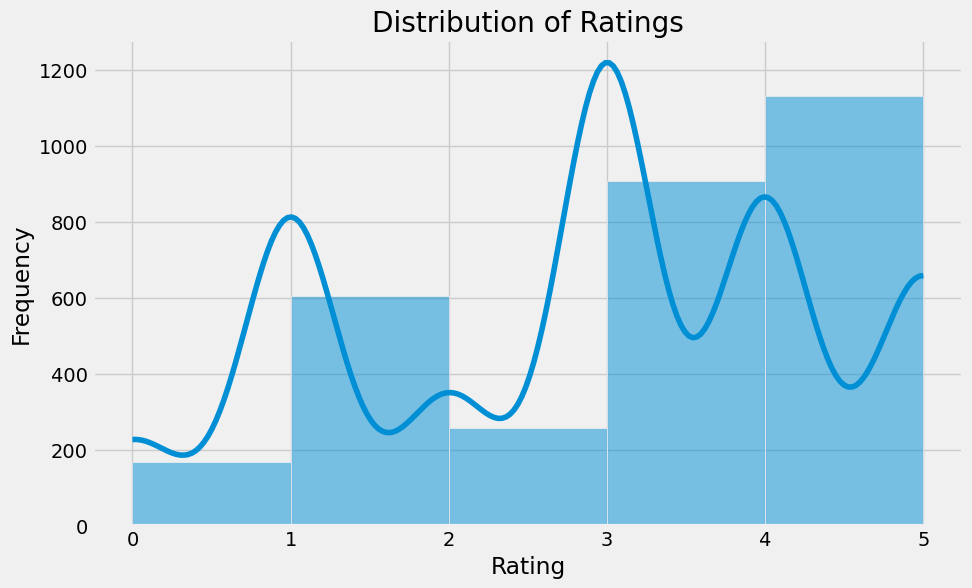

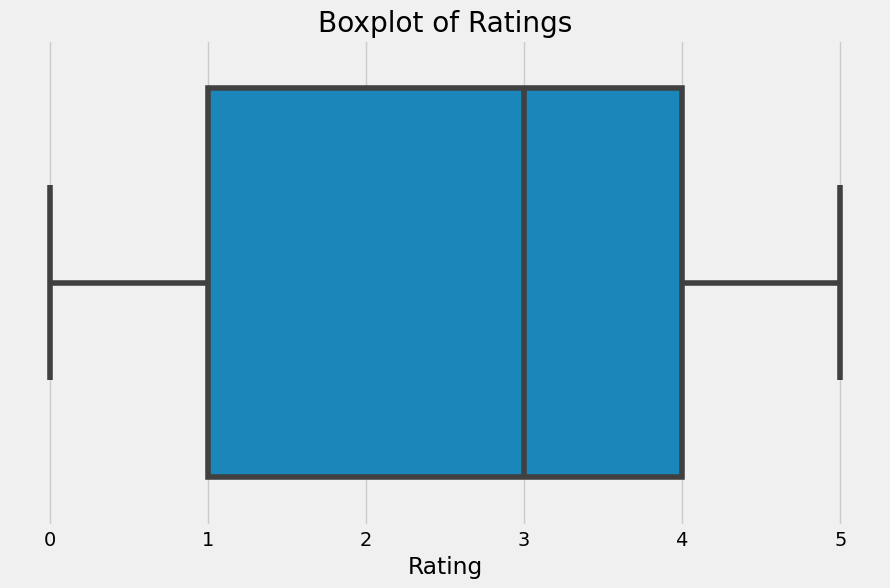

In [37]:
# Plot the distribution of the Rating column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the spread of Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()


 The histogram displaying rating frequencies reveals a right-skewed pattern, with a concentration of higher ratings. This suggests a positive bias in customer sentiment, as scores tend to cluster towards the upper end of the rating scale.










The boxplot reveals a relatively symmetrical distribution of ratings with minimal variation. The median rating falls around 3, indicating that half of the ratings are above this point and half are below. The box, representing the interquartile range, is relatively narrow, suggesting that the majority of ratings cluster around the median. The presence of whiskers and outliers is minimal, indicating a lack of extreme values in the dataset. 


#### CHECKING THE DISTRIBUTION OF REVIEW LENGTHS AND ITS RELATIONSHIP WITH RATING.

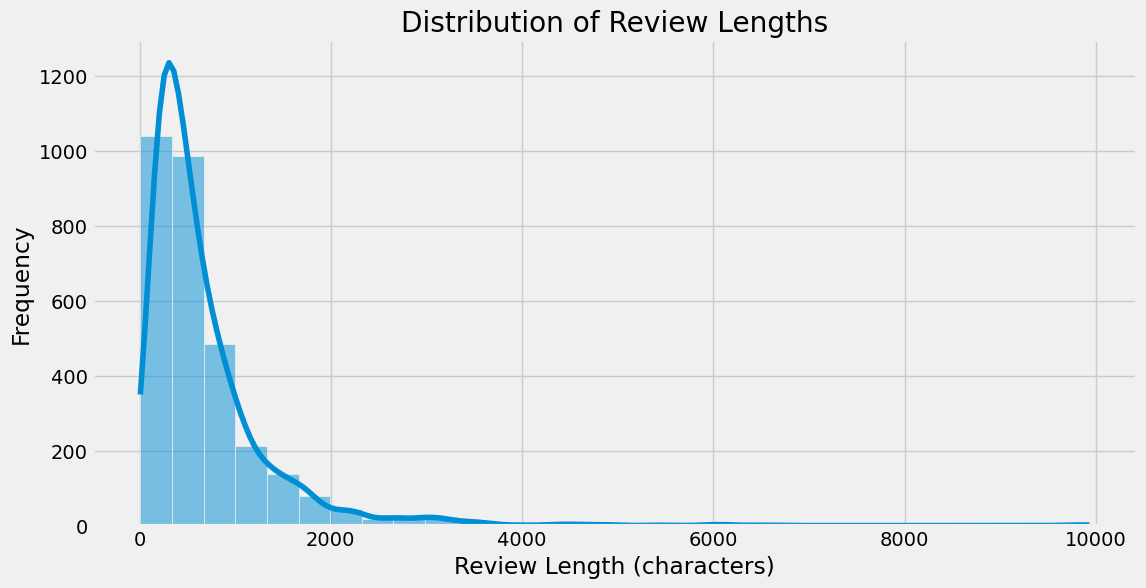

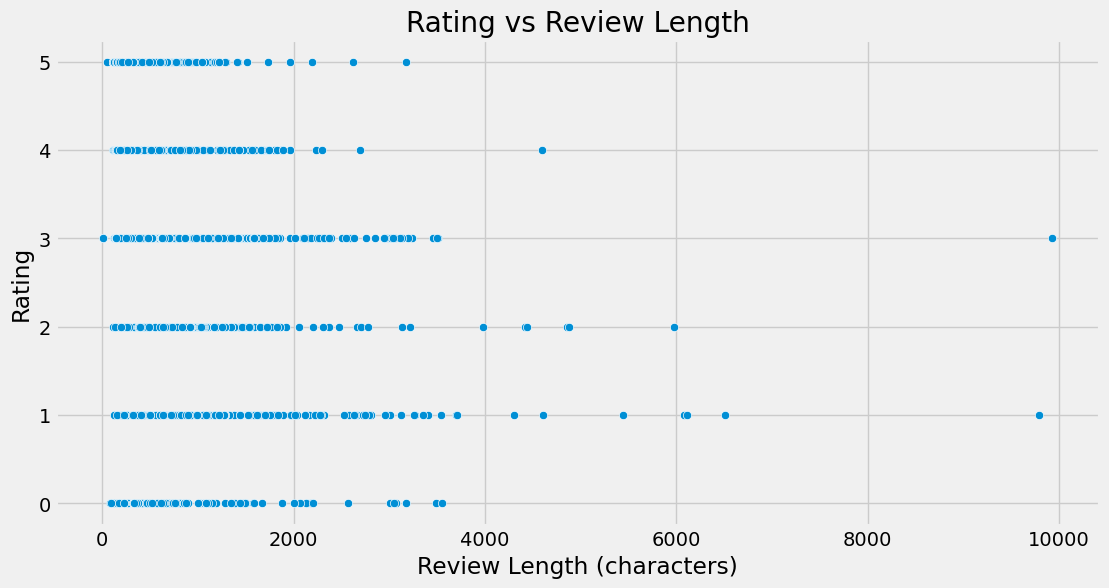

In [38]:
# Add a column for the length of each review
df['Review_Length'] = df['Review'].apply(lambda x: len(str(x)))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['Review_Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Scatterplot of Rating vs Review Length
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Review_Length', y='Rating', data=df)
plt.title('Rating vs Review Length')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()


The distribution is heavily skewed to the right, indicating that most reviews are relatively short. A significant portion of reviews falls within the first 2000 characters, with a rapid decline in frequency as review length increases. The presence of a long tail suggests the existence of a smaller number of very long reviews.

The scatter plot reveals a lack of correlation between review length and rating. This indicates that the length of a review does not significantly influence the score assigned by the customer. Factors beyond review length likely contribute more to the rating assigned by the customer.

#### WORD CLOUD FOR REVIEWS

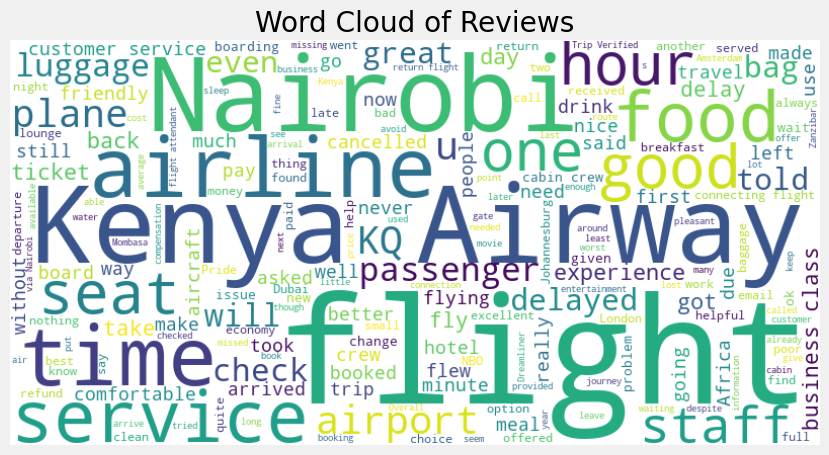

In [39]:


text = ' '.join(review for review in df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


#### TOP 20 POSITIVE AND NEGATIVE IMPACTFUL WORDS

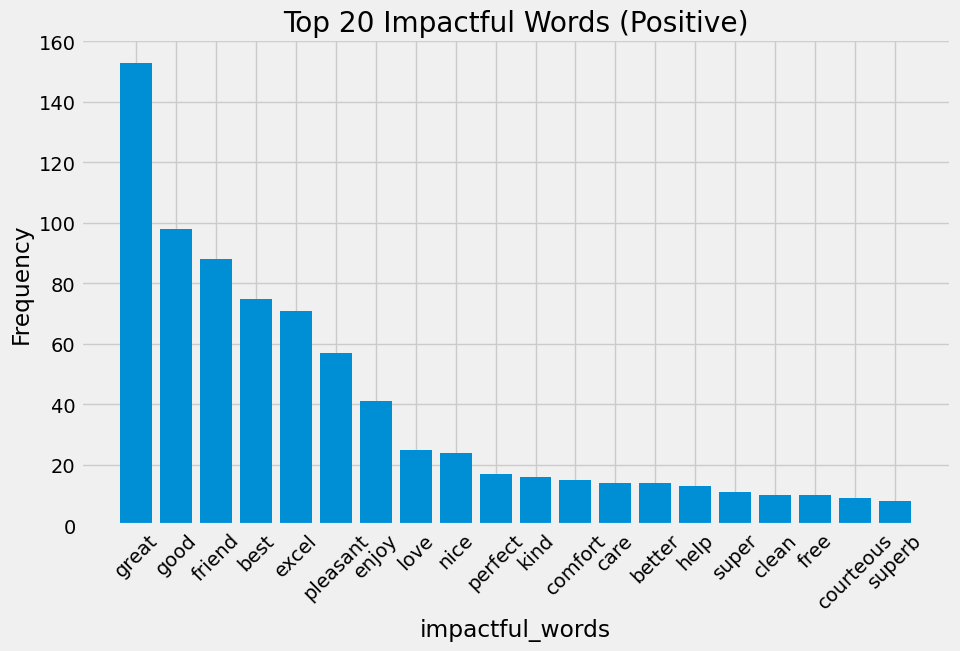

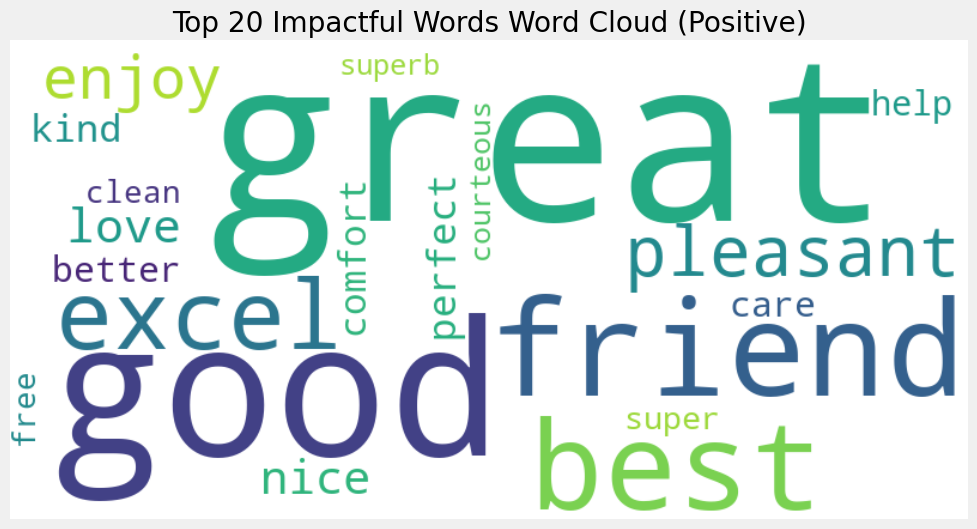

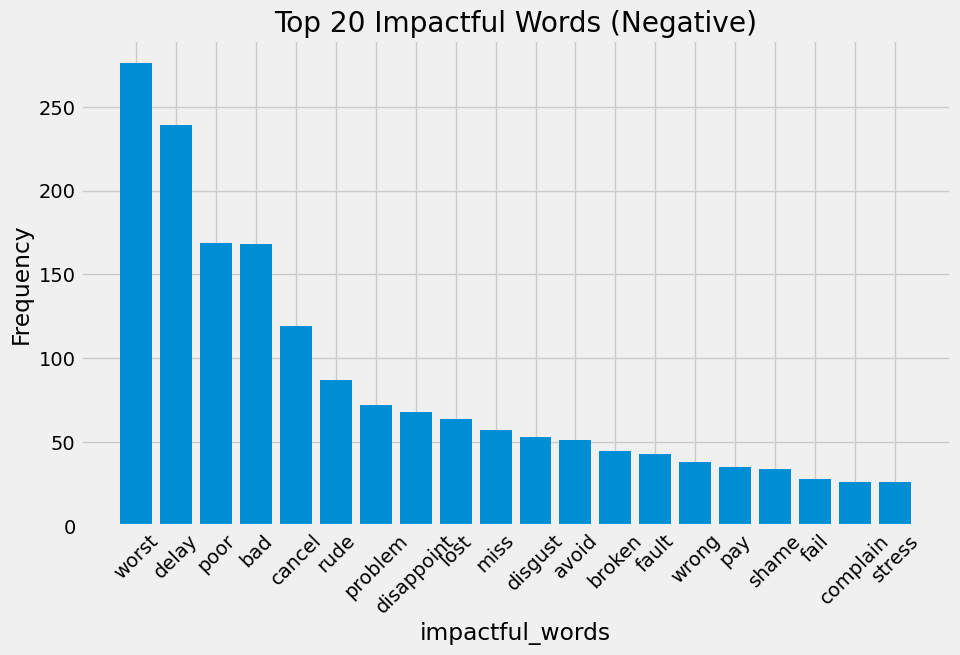

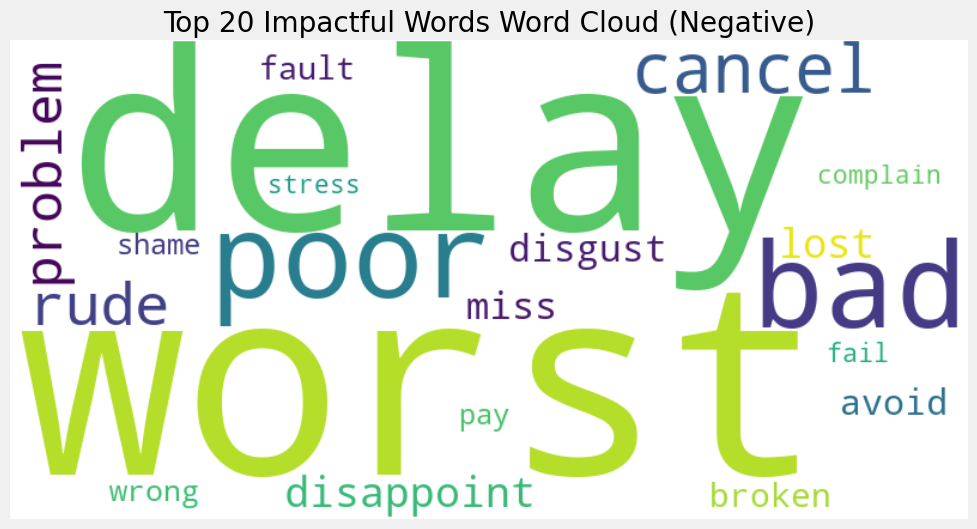

In [40]:
def plot_top_words(df, category, num_words=20, column='impactful_words'):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df[column].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')


#### AVERAGE RATING BY CLASS

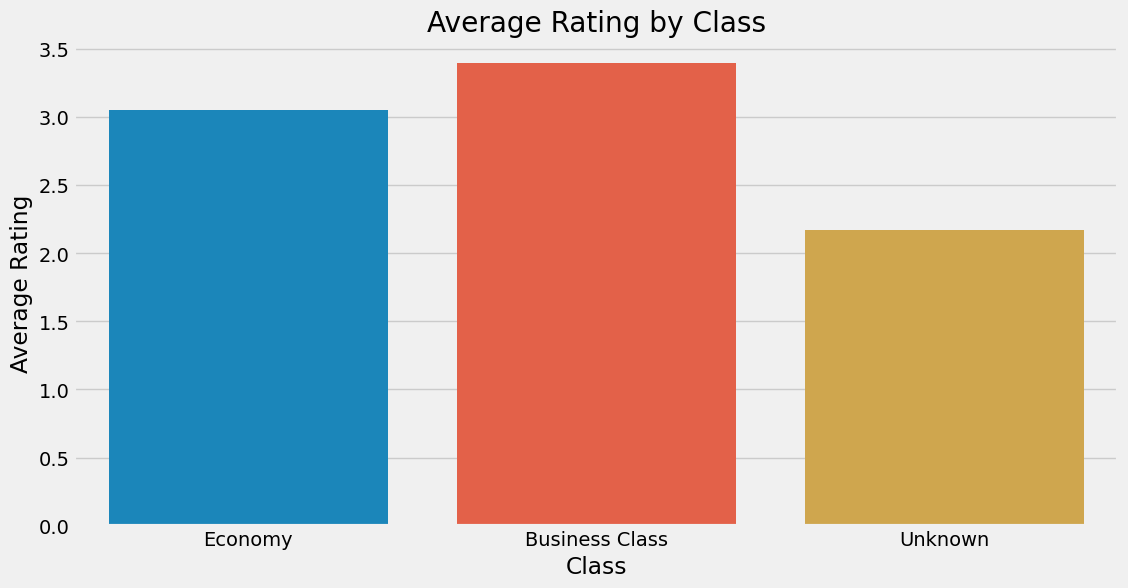

In [41]:
# Average Rating by Class
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Rating', data=df, ci=None)
plt.title('Average Rating by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.show()


There seems to be a clear disparity in average ratings based on passenger class. Business Class passengers report significantly higher satisfaction levels compared to Economy Class passengers. 



#### AVERAGE RATING BY DEPARTURE TYPE


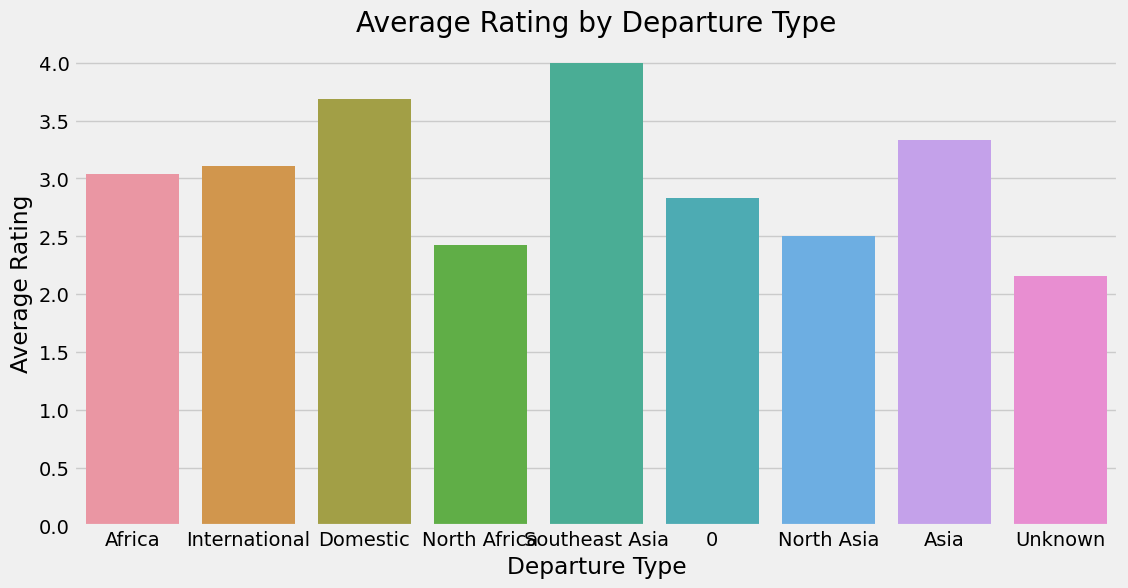

In [42]:
# Average Rating by Departure Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Departures', y='Rating', data=df, ci=None)
plt.title('Average Rating by Departure Type')
plt.xlabel('Departure Type')
plt.ylabel('Average Rating')
plt.show()


There are variations in average ratings across different departure types, suggesting that factors related to departure location might influence passenger satisfaction.

##### CORRELATION ANALYSIS BETWEEN RATING AND REVIEW LENGTH.


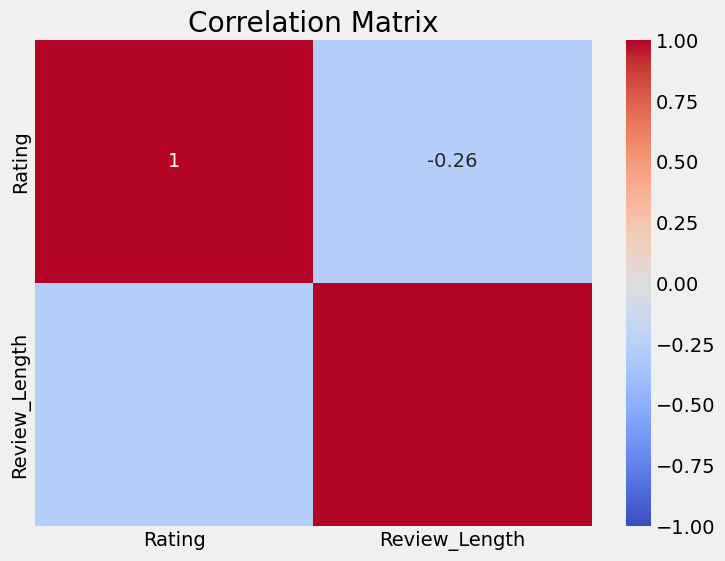

In [43]:
# Compute correlation matrix for numerical columns
correlation_matrix = df[['Rating', 'Review_Length']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix indicates a weak negative correlation (-0.26) between Rating and Review_Length. This implies that as the length of a review increases, the rating tends to slightly decrease, but the relationship is not particularly strong.

In other words, longer reviews are not necessarily associated with significantly higher or lower ratings. Other factors likely play a more significant role in determining the rating assigned to a review.

##  MODELLING

In [44]:
###  Prepare the data
KQ_df.columns

Index(['Rating_Description', 'Review', 'Rating', 'Tokenized_Review',
       'Impactful_Words'],
      dtype='object')

In [46]:
# Display the DataFrame with the tokenized and impactful words
(KQ_df[['Rating_Description','Review','Rating' ,'Tokenized_Review', 'Impactful_Words']].head())
# Check the first few entries in the Tokenized_Review column
(KQ_df['Tokenized_Review'].head())

0    [recent, travel, busi, cape, town, entebb, uga...
1    [want, thank, jane, excel, servic, flight, con...
2    [not, bad, airlin, fli, could, better, select,...
3    [way, zanzibar, bangui, upgrad, flight, sky, p...
4    [absolut, appal, airlin, never, ever, use, inc...
Name: Tokenized_Review, dtype: object

In [47]:
# Define the mapping from numerical ratings to sentiments
rating_mapping = {
    0.0: 'negative',
    1.0: 'negative',
    2.0: 'negative',
    3.0: 'neutral',
    4.0: 'positive',
    5.0: 'positive'
}

# Apply the mapping to the 'Rating' column
df['sentiment'] = df['Rating'].map(rating_mapping)

# Check the transformation
print(df[['Rating', 'sentiment']].head())


# Check the final DataFrame
df.head()

   Rating sentiment
0     4.0  positive
1     5.0  positive
2     4.0  positive
3     1.0  negative
4     1.0  negative


,Date3,Departures,Class,Review,Rating,Rating_Description,Review_Length,sentiment
0,2022-09-01 00:00:00,Africa,Economy,Recently I travelled for business from Cape To...,4.0,Good,1439,positive
1,2022-11-01 00:00:00,International,Economy,I want to thanks to Jane for her excellent ser...,5.0,Excellent,299,positive
2,2022-05-01 00:00:00,International,Economy,not a bad airline to fly with could do with a ...,4.0,Good,155,positive
3,2022-11-01 00:00:00,Africa,Business Class,"Dear Kenya Airways ,\r\n\r\nI am on my way to ...",1.0,Poor,3408,negative
4,2022-11-01 00:00:00,Africa,Economy,"Absolutely appalling airline, never ever use i...",1.0,Poor,1152,negative


In [65]:
# Preprocessing
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import nltk
from nltk.stem import PorterStemmer
from sklearn.svm import SVC

In [61]:
# Initialize NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def preprocess_text(text):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [ps.stem(w) for w in words if w not in stop_words and w.isalpha()]
    return ' '.join(words)

def get_review_sentiment(review):
    sentiment_score = sia.polarity_scores(review)['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

def determine_final_sentiment(row):
    review_sentiment = get_review_sentiment(row['Review'])
    rating = row['Rating']
    
    if review_sentiment == 'positive' or rating >= 4:
        return 'positive'
    elif review_sentiment == 'negative' or rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to determine sentiment
KQ_df['sentiment'] = df.apply(determine_final_sentiment, axis=1)

# Check the transformation
(KQ_df[['Rating', 'Review', 'sentiment']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Rating,Review,sentiment
0,4.0,recent travel busi cape town entebb uganda lay...,positive
1,5.0,want thank jane excel servic flight connect ke...,positive
2,4.0,not bad airlin fli could better select movi mu...,positive
3,1.0,way zanzibar bangui upgrad flight sky prioriti...,negative
4,1.0,absolut appal airlin never ever use incred unr...,negative


###  Model Training


# Models.
1.Logistic Regression.

2.Random Forest

3.Xgboost Model

4.SVM model.

In [68]:
# Define features (X) and target (y)
X_reviews = KQ_df['Review']
X_ratings = KQ_df['Rating']
y = KQ_df['sentiment']


# Apply the preprocessing to the reviews
X_reviews = X_reviews.apply(preprocess_text)

# Initialize the vectorizer and fit/transform the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_reviews_transformed = vectorizer.fit_transform(X_reviews).toarray()

# Convert ratings into a 2D array with one feature (reshape for concatenation)
X_ratings_transformed = X_ratings.values.reshape(-1, 1)

# Concatenate the review features with the rating feature
X_combined = np.hstack((X_reviews_transformed, X_ratings_transformed))

# Handle missing values by imputing (if any)
imputer = SimpleImputer(strategy='mean')
X_combined = imputer.fit_transform(X_combined)

# Encode the target variable (sentiment)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize SMOTE and apply it to the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_combined, y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [63]:
def train_and_evaluate_model(df, model, text_column='Review', rating_column='Rating', target_column='sentiment'):
    """
    Function to preprocess text and numeric data, train a specified model, and evaluate its performance.
    """
    # Apply preprocessing and transformation steps as described above
    # Preprocessing and feature extraction should be done here

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print("-" * 60)

In [66]:
# Instantiate models
log_reg = LogisticRegression(max_iter=1000,random_state=1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=3)
nb_model = MultinomialNB()
svm_model = SVC(random_state=5)

# Train and evaluate each model
train_and_evaluate_model(KQ_df, log_reg)
train_and_evaluate_model(KQ_df, rf)
train_and_evaluate_model(KQ_df, xgb_model)
train_and_evaluate_model(KQ_df,nb_model)
train_and_evaluate_model(KQ_df,svm_model)

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       346
           1       1.00      1.00      1.00       359
           2       0.93      0.85      0.89       398

    accuracy                           0.92      1103
   macro avg       0.93      0.93      0.92      1103
weighted avg       0.93      0.92      0.92      1103

Accuracy: 0.9238440616500453
------------------------------------------------------------
Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       346
           1       1.00      1.00      1.00       359
           2       0.93      0.84      0.88       398

    accuracy                           0.92      1103
   macro avg       0.92      0.92      0.92      1103
weighted avg       0.92      0.92      0.92      1103

Accuracy: 0.9174977334542158
------------------------------------------------------------
Mo

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       346
           1       1.00      1.00      1.00       359
           2       0.93      0.85      0.89       398

    accuracy                           0.92      1103
   macro avg       0.93      0.93      0.92      1103
weighted avg       0.93      0.92      0.92      1103



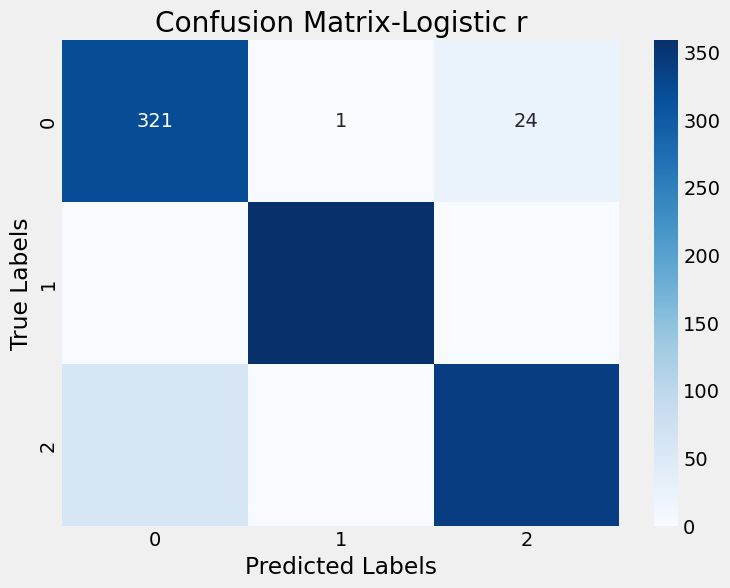

In [67]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-Logistic r')
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       346
           1       0.98      1.00      0.99       359
           2       0.84      0.86      0.85       398

    accuracy                           0.89      1103
   macro avg       0.89      0.89      0.89      1103
weighted avg       0.89      0.89      0.89      1103



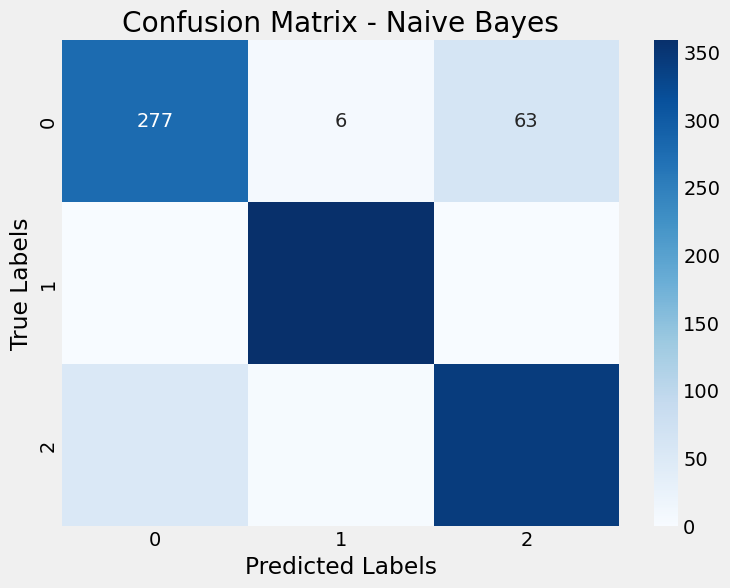

In [71]:
###  2. NAIVE BAYES
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Compute and plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       346
           1       0.99      1.00      1.00       359
           2       0.96      0.80      0.87       398

    accuracy                           0.91      1103
   macro avg       0.92      0.92      0.91      1103
weighted avg       0.92      0.91      0.91      1103



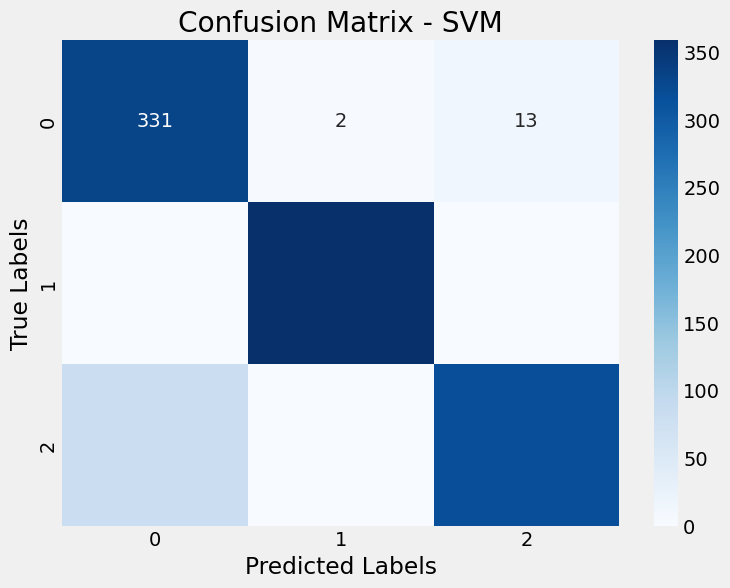

In [72]:
###  3.  SVM
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(random_state=5)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Compute and plot the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       346
           1       1.00      1.00      1.00       359
           2       0.91      0.84      0.87       398

    accuracy                           0.91      1103
   macro avg       0.91      0.91      0.91      1103
weighted avg       0.91      0.91      0.91      1103



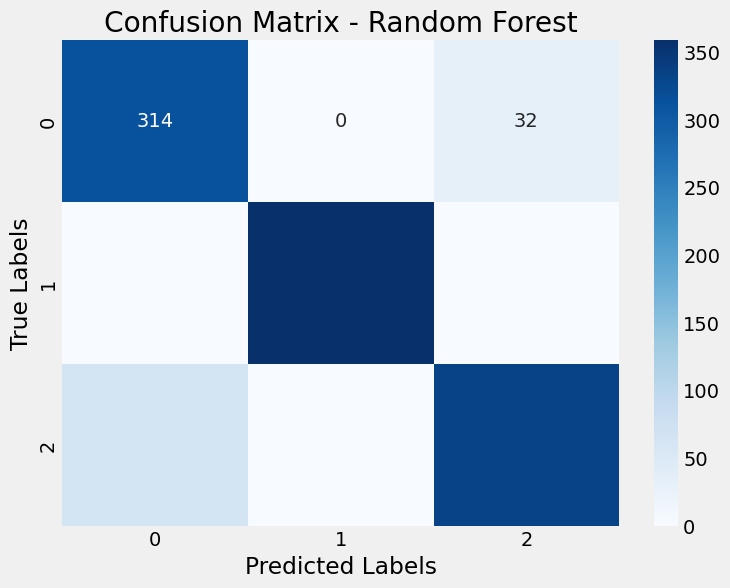

In [73]:
#4.  RANDOM FOREST

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       346
           1       1.00      1.00      1.00       359
           2       0.92      0.84      0.88       398

    accuracy                           0.92      1103
   macro avg       0.92      0.92      0.92      1103
weighted avg       0.92      0.92      0.92      1103



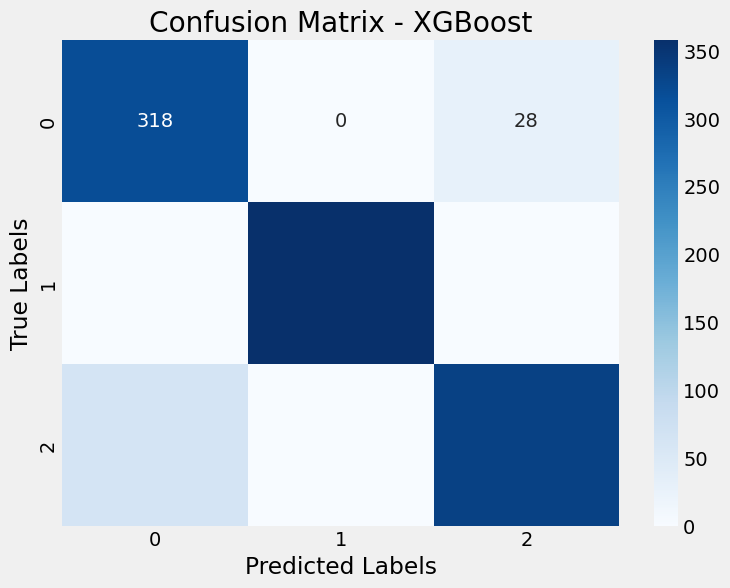

In [75]:
###  5.  XG-BOOST
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Compute and plot the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Hyperparametre Tuning for Logistic Regression


In [74]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Best Parameters: {'C': 7.9060432109076855, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       346
           1       0.99      1.00      1.00       359
           2       0.94      0.86      0.90       398

    accuracy                           0.93      1103
   macro avg       0.93      0.93      0.93      1103
weighted avg       0.93      0.93      0.93      1103



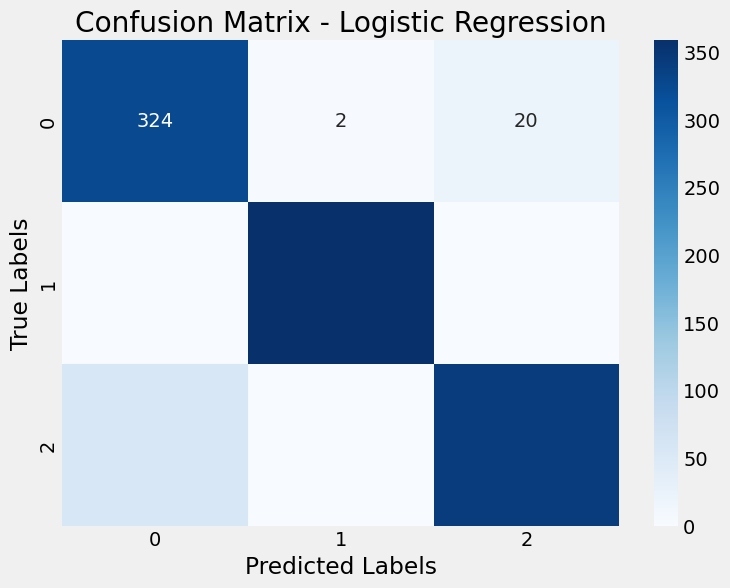

In [76]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    
    'C': np.logspace(-4, 4),  # Regularization strength
    'solver': ['liblinear']  # Solver that supports both l1 and l2 regularization
}

# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=1)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=3,  scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 30}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       346
           1       0.99      1.00      1.00       359
           2       0.94      0.81      0.87       398

    accuracy                           0.91      1103
   macro avg       0.91      0.91      0.91      1103
weighted avg       0.92      0.91      0.91      1103



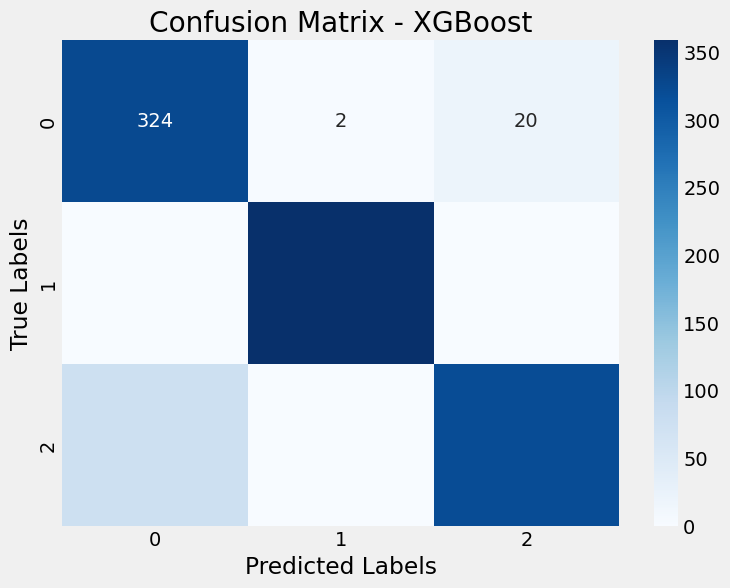

In [78]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
      
    'max_depth': [3, 5, 7,],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1],  # Learning rate
    'n_estimators': [10,20,30],  # Number of boosting rounds
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Compute and plot the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=best_xgb_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Fitting the best parametres for the best performing model(Logistic Regression)

In [79]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       346
           1       0.99      1.00      1.00       359
           2       0.94      0.86      0.90       398

    accuracy                           0.93      1103
   macro avg       0.93      0.93      0.93      1103
weighted avg       0.93      0.93      0.93      1103



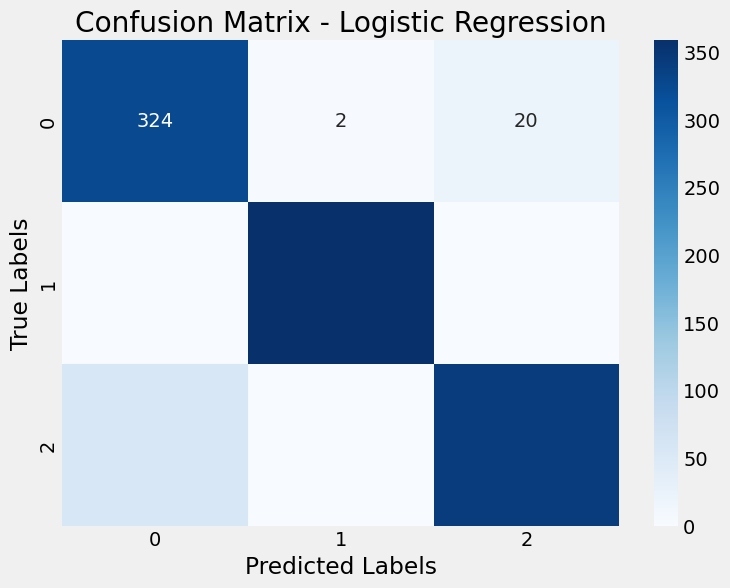

Model saved to log_reg_model.pkl


In [80]:
# Define the model with the specified hyperparameters
log_reg = LogisticRegression(
    C=7.9060432109076855,  # Specified regularization strength
    solver='liblinear',    # Solver for optimization
    random_state=1
)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Save the model to a pickle file
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

print("Model saved to log_reg_model.pkl")


In [81]:
# Saving the vectorizer 

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer and transform the data
vectorizer = TfidfVectorizer(max_features=5000)
X_reviews_transformed = vectorizer.fit_transform(X_reviews).toarray()

# Save the vectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

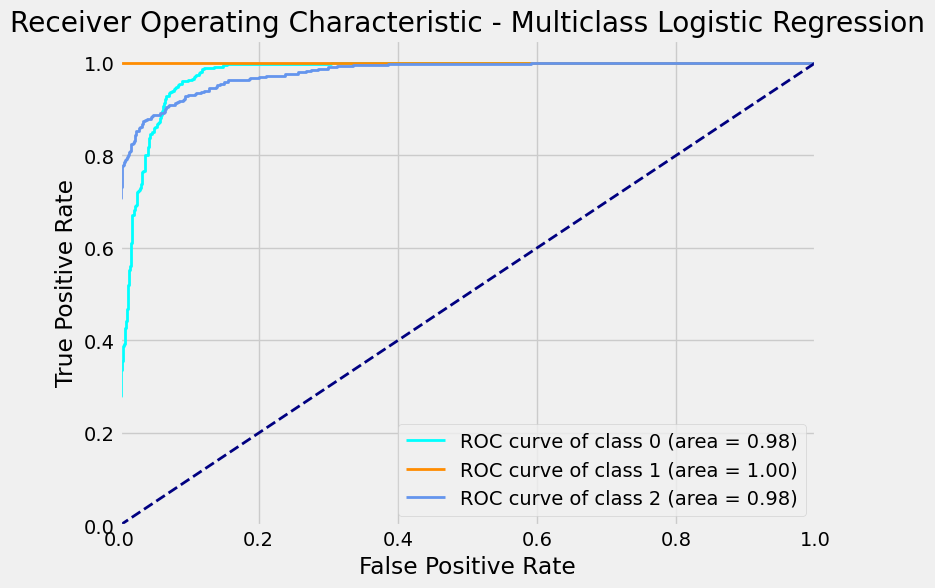

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Binarize the labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes=log_reg.classes_)
n_classes = y_test_binarized.shape[1]

# Train a One-vs-Rest classifier
classifier = OneVsRestClassifier(log_reg)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass Logistic Regression')
plt.legend(loc="lower right")
plt.show()


The ROC curve analysis shows the multiclass logistic regression model performs exceptionally well in distinguishing between three classes. Each class's ROC curve is well above the diagonal line representing random guessing, with AUC values of 0.98, 1.00, and 0.98 for classes 0, 1, and 2, respectively. This indicates strong discriminatory power, particularly for class 1, which the model classifies almost perfectly. Overall, the model demonstrates excellent performance across all classes.

# Model Evaluation.

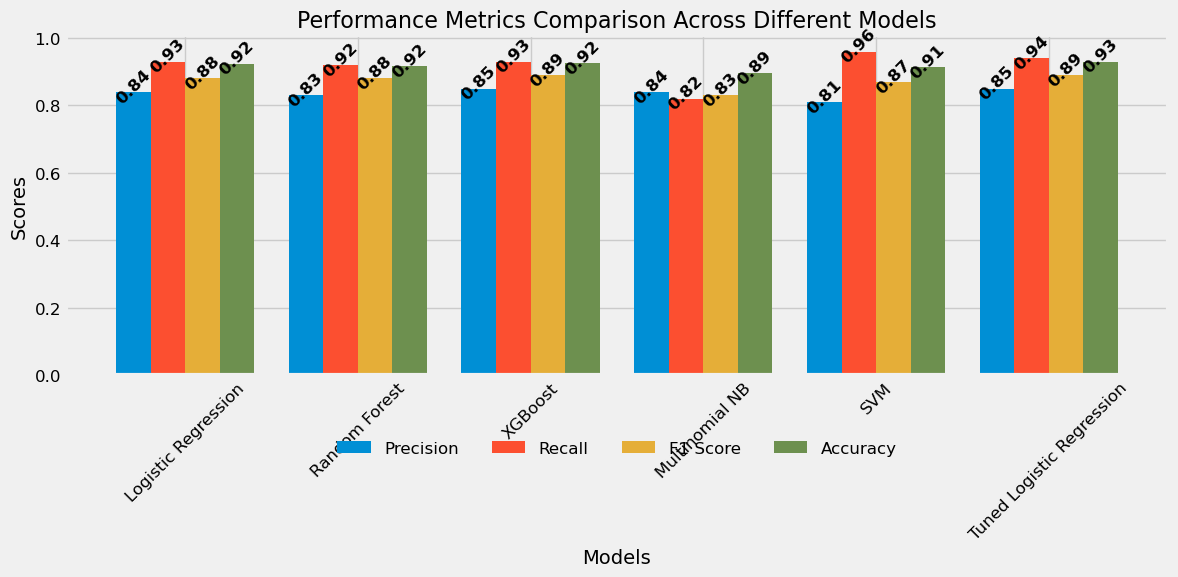

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the models
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Multinomial NB', 'SVM', 'Tuned Logistic Regression']

# Updated performance metrics
precision = [0.84, 0.83, 0.85, 0.84, 0.81, 0.85]
recall = [0.93, 0.92, 0.93, 0.82, 0.96, 0.94]
f1_score = [0.88, 0.88, 0.89, 0.83, 0.87, 0.89]
accuracy = [0.9238, 0.9175, 0.9247, 0.8948, 0.9139, 0.9300]  # Rounded to match accuracy from report

# Set up the plot
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Performance Metrics Comparison Across Different Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False, fontsize=12)

# Function to add slanted labels inside the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),  # Vertical offset to place labels inside the bars
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold', color='black', rotation=45)  # Slanted labels in black

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.xticks(rotation=45, fontsize=12)  # Increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.tight_layout()
plt.show()


Tuned Logistic Regression consistently achieves the highest overall scores in Precision, Recall, F1 Score, and Accuracy, making it the best-performing model.

XGBoost is another strong contender, with slightly lower Precision but still competitive across the other metrics.
SVM has the highest Recall but lower Precision, indicating that it might be better at identifying positive instances but also has a higher false positive rate.

Recommendation:

Based on the performance metrics, Tuned Logistic Regression is the best model for this particular dataset and task, offering a good balance between Precision, Recall, F1 Score, and Accuracy.